In [1]:
#!pip install networkx
import pandas as pd
residualized_data2007SA = pd.read_csv('residualized_data2007SexAgeResid.csv')
columnsnames = residualized_data2007SA.columns.tolist()
columnsnames

['Alanine',
 'Glutamine',
 'Histidine',
 'Isoleucine',
 'Leucine',
 'Phenylalanine',
 'Tyrosine',
 'Valine',
 'Apolipoprotein_A_I',
 'Apolipoprotein_B',
 'Esterified_cholesterol',
 'Free_cholesterol',
 'Total_cholesterol_HDL',
 'Total_cholesterol_HDL2',
 'Total_cholesterol_HDL3',
 'Total_cholesterol_LDL',
 'Remnant_cholesterol',
 'Serum_total_cholesterol',
 'Total_cholesterol_VLDL',
 'Linoleic_acid',
 'Docosahexaenoic_acid',
 'Linoleic_acid_R18_2',
 'Monounsaturated_fatty_acids',
 'Omega3_fatty_acids',
 'Omega6_fatty_acids',
 'Polyunsaturated_fatty_acids',
 'Saturated_fatty_acids',
 'Albumin_signal_area',
 'Creatinine',
 'Phosphatidylcholine',
 'Serum_total_triglycerides',
 'Sphingomyelins',
 'Total_cholines',
 'Total_phosphoglycerides',
 'Triglycerides_HDL',
 'Triglycerides_LDL',
 'Triglycerides_VLDL',
 'Citrate',
 'Glucose',
 'Lactate',
 'Glycoprotein_acetyls',
 'Hydroxybutyrate',
 'Acetate',
 'Acetoacetate',
 'HDL_particles_diameter',
 'LDL_particles_diameter',
 'VLDL_particles_diam

In [2]:

def import_adjacency_matrix(file_path, columnsnames):
    dataframe = pd.read_csv(file_path, header=None)
    variable_names = columnsnames
        
    
    dataframe.columns = variable_names
    dataframe.index = variable_names
    return dataframe

# Usage
file_path = 'adjacency_matrix_2007SA.csv'
df = import_adjacency_matrix(file_path, columnsnames = columnsnames)


import networkx as nx

# Create an empty graph
graph = nx.Graph()

# Assume df is a DataFrame containing the necessary data

# Assume the DataFrame df is already defined with appropriate data

# List of depressive symptoms
depressive_symptoms = [ 'Sadness',
 'Pessimism',
 'Past_failure',
 'Loss_of_pleasure',
 'Guilty_feelings',
 'Punishment_feelings',
 'Self_dislike',
 'Self_criticalness',
 'Suicidal_thought_or_wishes',
 'Crying',
 'Agitation',
 'Loss_of_interest',
 'Indecisiveness',
 'Worthlessness',
 'Loss_of_energy',
 'Changes_in_sleep_pattern',
 'Irritability',
 'Changes_in_appetite',
 'Concentration_difficulty',
 'Tiredness_or_fatigue',
 'Loss_of_interest_in_sex']
    
    
risk_factors = [ 'Systolic_blood_pressure',
 'Diastolic_blood_pressure',
 'Intima_media_thickness']


metabolites= ['Alanine',
 'Glutamine',
 'Histidine',
 'Isoleucine',
 'Leucine',
 'Phenylalanine',
 'Tyrosine',
 'Valine',
 'Apolipoprotein_A_I',
 'Apolipoprotein_B',
 'Esterified_cholesterol',
 'Free_cholesterol',
 'Total_cholesterol_HDL',
 'Total_cholesterol_HDL2',
 'Total_cholesterol_HDL3',
 'Total_cholesterol_LDL',
 'Remnant_cholesterol',
 'Serum_total_cholesterol',
 'Total_cholesterol_VLDL',
 'Linoleic_acid',
 'Docosahexaenoic_acid',
 'Linoleic_acid_R18_2',
 'Monounsaturated_fatty_acids',
 'Omega3_fatty_acids',
 'Omega6_fatty_acids',
 'Polyunsaturated_fatty_acids',
 'Saturated_fatty_acids',
 'Albumin_signal_area',
 'Creatinine',
 'Phosphatidylcholine',
 'Serum_total_triglycerides',
 'Sphingomyelins',
 'Total_cholines',
 'Total_phosphoglycerides',
 'Triglycerides_HDL',
 'Triglycerides_LDL',
 'Triglycerides_VLDL',
 'Citrate',
 'Glucose',
 'Lactate',
 'Glycoprotein_acetyls',
 'Hydroxybutyrate',
 'Acetate',
 'Acetoacetate',
 'HDL_particles_diameter',
 'LDL_particles_diameter',
 'VLDL_particles_diameter',
 'Degree_of_unsaturation',
 'Total_fatty_acids']


# Assume df is a DataFrame containing the necessary data
# Iterate over the columns and rows of the DataFrame
for column in df.columns:
    for row in df.index:
        # Check if the cell value is non-zero
        if df.loc[row, column] != 0:
            # Add an edge to the graph
            graph.add_edge(column, row)
            



In [3]:
# List to store metabolites connected to depressive symptoms
metabolites_connected_to_depression = []

# Traverse the graph and check for connections between depressive symptoms and metabolites
for symptom in depressive_symptoms:
    # Get neighbors of depressive symptom
    neighbors = list(graph.neighbors(symptom))
    # Filter out metabolites from neighbors
    metabolites_neighbors = [neighbor for neighbor in neighbors if neighbor in metabolites]
    # Add metabolites connected to depressive symptoms to the list
    metabolites_connected_to_depression.extend(metabolites_neighbors)

# Remove duplicates
metabolites_connected_to_depression = list(set(metabolites_connected_to_depression))

# Print the metabolites connected to depressive symptoms
print("Metabolites connected to depressive symptoms:")
print(metabolites_connected_to_depression)

# List to store metabolites connected to risk factors
metabolites_connected_to_risk_factors = []

# Traverse the graph and check for connections between risk factors and metabolites
for factor in risk_factors:
    # Get neighbors of risk factor
    neighbors = list(graph.neighbors(factor))
    # Filter out metabolites from neighbors
    metabolites_neighbors = [neighbor for neighbor in neighbors if neighbor in metabolites]
    # Add metabolites connected to risk factors to the list
    metabolites_connected_to_risk_factors.extend(metabolites_neighbors)

# Remove duplicates
metabolites_connected_to_risk_factors = list(set(metabolites_connected_to_risk_factors))

# Print the metabolites connected to risk factors
print("Metabolites connected to risk factors:")
print(metabolites_connected_to_risk_factors)

# Find the common metabolites connected to both depressive symptoms and risk factors
common_metabolites = set(metabolites_connected_to_depression).intersection(set(metabolites_connected_to_risk_factors))

# Print the common metabolites
print("Common metabolites connected to both depressive symptoms and risk factors:")
print(common_metabolites)

In [4]:
# Create an empty graph
graph = nx.Graph()

df.iloc[0:49, 0:49] = 0.0
df.iloc[49:70, 49:70]  = 0.0
df.iloc[70:74, 70:74] = 0.0
df

# Add nodes to the graph
nodes = df.columns
graph.add_nodes_from(nodes)

# Iterate through the adjacency matrix to determine connections
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        if df.iloc[i, j] != 0:
            graph.add_edge(nodes[i], nodes[j])



# Assuming your adjacency matrix is stored in a dataframe called 'adjacency_df'

# List of risk factors to be dropped
risk_factors_to_drop = [ 'Systolic_blood_pressure',
 'Diastolic_blood_pressure',
 'Intima_media_thickness']

# Drop the specified columns and rows from the DataFrame
df_filtered = df.drop(columns=risk_factors_to_drop, index=risk_factors_to_drop)

df_filtered.iloc[0:49, 0:49] = 0.0
df_filtered.iloc[49:70, 49:70] = 0.0


# Get the indices and columns as node labels
nodes = df_filtered.index.tolist()



# Initialize an empty list to store the edgelist
edgelist = []

# Iterate through each pair of nodes in the adjacency matrix
for i, source_node in enumerate(nodes):
    for j, target_node in enumerate(nodes):
        weight = df_filtered.iloc[i, j]  # Get the weight from the adjacency matrix
        
        # Check if the weight is non-zero, indicating an edge exists
        if weight != 0:
            # Append the edge as a tuple (source, target, weight) to the edgelist
            edgelist.append((source_node, target_node, weight))

# Create a dataframe from the edgelist
edgelist_df = pd.DataFrame(edgelist, columns=['source', 'target', 'weight'])

#Depressive symptoms
import pandas as pd

# Assuming your edgelist is stored in a dataframe called 'edgelist_df'

# Create an empty dictionary to store the results
metabolite_weightsD = {}

# Iterate over each unique source feature
for source in edgelist_df['source'].unique():
    # Filter the edgelist for the current source feature
    filtered_df = edgelist_df[edgelist_df['source'] == source]
    
    #Display the weights for the current source feature
    #print(f"Weights for source '{source}':")
    #print(filtered_df)
    
    # Calculate the sum of weights for the current source feature
    weight_sum = filtered_df['weight'].sum()
    #print(f"Sum of weights for source '{source}': {weight_sum}")
    
        # Store the metabolite name and weight sum in the dictionary
    metabolite_weightsD[source] = weight_sum

# Print the resulting dictionary
print(metabolite_weightsD)



{'Histidine': 0.0136389620279529, 'Isoleucine': 0.0106723390587317, 'Leucine': 0.0243615655018198, 'Phenylalanine': 0.0209164077983322, 'Valine': 0.0088738244455733, 'Apolipoprotein_A_I': 0.0338609422103705, 'Total_cholesterol_LDL': 0.0228578655450112, 'Docosahexaenoic_acid': 0.0415412710525164, 'Omega3_fatty_acids': 0.0112821524242087, 'Saturated_fatty_acids': 0.045277438678428, 'Albumin_signal_area': 0.0104218470799029, 'Creatinine': 0.0299885587415823, 'Triglycerides_HDL': 0.0289421801314095, 'Citrate': 0.0120098481166768, 'Glucose': 0.0111654618382068, 'Lactate': 0.0218692432933442, 'Glycoprotein_acetyls': 0.0103984242219694, 'Acetate': 0.0348956632760183, 'LDL_particles_diameter': 0.0236673290725875, 'Degree_of_unsaturation': 0.0119348910858984, 'Past_failure': 0.0348956632760183, 'Guilty_feelings': 0.0103984242219694, 'Loss_of_interest': 0.0099890856969756, 'Indecisiveness': 0.0136389620279529, 'Worthlessness': 0.0120098481166768, 'Changes_in_sleep_pattern': 0.2597684748029678, '

In [5]:
#run again df 
#cvh related

# Assuming your adjacency matrix is stored in a dataframe called 'adjacency_df'

# List of risk factors to be dropped
depressive_symptoms_to_drop = [ 'Sadness',
 'Pessimism',
 'Past_failure',
 'Loss_of_pleasure',
 'Guilty_feelings',
 'Punishment_feelings',
 'Self_dislike',
 'Self_criticalness',
 'Suicidal_thought_or_wishes',
 'Crying',
 'Agitation',
 'Loss_of_interest',
 'Indecisiveness',
 'Worthlessness',
 'Loss_of_energy',
 'Changes_in_sleep_pattern',
 'Irritability',
 'Changes_in_appetite',
 'Concentration_difficulty',
 'Tiredness_or_fatigue',
 'Loss_of_interest_in_sex']

# Drop the specified columns and rows from the DataFrame
df_filtered = df.drop(columns=depressive_symptoms_to_drop, index=depressive_symptoms_to_drop)
df_filtered


df_filtered.iloc[0:49, 0:49] = 0.0
df_filtered.iloc[70:74, 70:74] = 0.0

# # Get the indices and columns as node labels
nodes = df_filtered.index.tolist()

# Initialize an empty list to store the edgelist
edgelist = []

# Iterate through each pair of nodes in the adjacency matrix
for i, source_node in enumerate(nodes):
    for j, target_node in enumerate(nodes):
        weight = df_filtered.iloc[i, j]  # Get the weight from the adjacency matrix
        
        # Check if the weight is non-zero, indicating an edge exists
        if weight != 0:
            # Append the edge as a tuple (source, target, weight) to the edgelist
            edgelist.append((source_node, target_node, weight))

# Create a dataframe from the edgelist
edgelist_df = pd.DataFrame(edgelist, columns=['source', 'target', 'weight'])

#Depressive symptoms
import pandas as pd

# Assuming your edgelist is stored in a dataframe called 'edgelist_df'

# Create an empty dictionary to store the results
metabolite_weightsCVD = {}

# Iterate over each unique source feature
for source in edgelist_df['source'].unique():
    # Filter the edgelist for the current source feature
    filtered_df = edgelist_df[edgelist_df['source'] == source]
    
    # Display the weights for the current source feature
#     print(f"Weights for source '{source}':")
#     print(filtered_df)
    
    # Calculate the sum of weights for the current source feature
    weight_sum = filtered_df['weight'].sum()
   # print(f"Sum of weights for source '{source}': {weight_sum}")
    
        # Store the metabolite name and weight sum in the dictionary
    metabolite_weightsCVD[source] = weight_sum

# Print the resulting dictionary
print(metabolite_weightsCVD)




{'Alanine': 0.0259993507292929, 'Tyrosine': 0.0568604238916417, 'Apolipoprotein_B': 0.0246125550346127, 'Total_cholesterol_HDL2': 0.0457937474052546, 'Total_cholesterol_HDL3': 0.0265125937431907, 'Omega3_fatty_acids': 0.0242946363933785, 'Albumin_signal_area': 0.0232259798625876, 'Creatinine': 0.008118170908098, 'Citrate': 0.0195534329025035, 'Glucose': 0.0197098693651153, 'Acetoacetate': 0.0065794312930057, 'HDL_particles_diameter': 0.043299552117153806, 'Systolic_blood_pressure': 0.06003545165597331, 'Diastolic_blood_pressure': 0.066960718375122, 'Intima_media_thickness': 0.1975635736147397}


In [6]:
result = {}
for key in metabolite_weightsCVD.keys():
    if key in metabolite_weightsD:
        result[key] = metabolite_weightsCVD[key] * metabolite_weightsD[key]

print(result)

{'Omega3_fatty_acids': 0.0002740957908808242, 'Albumin_signal_area': 0.00024205761040879212, 'Creatinine': 0.00024345224515170142, 'Citrate': 0.00023483375931869786, 'Glucose': 0.0002200697942322362}


{'Omega3_fatty_acids': 1.0, 'Albumin_signal_area': 0.4662872651404856, 'Creatinine': 0.4895199928360545, 'Citrate': 0.3459476807849464, 'Glucose': 0.1}


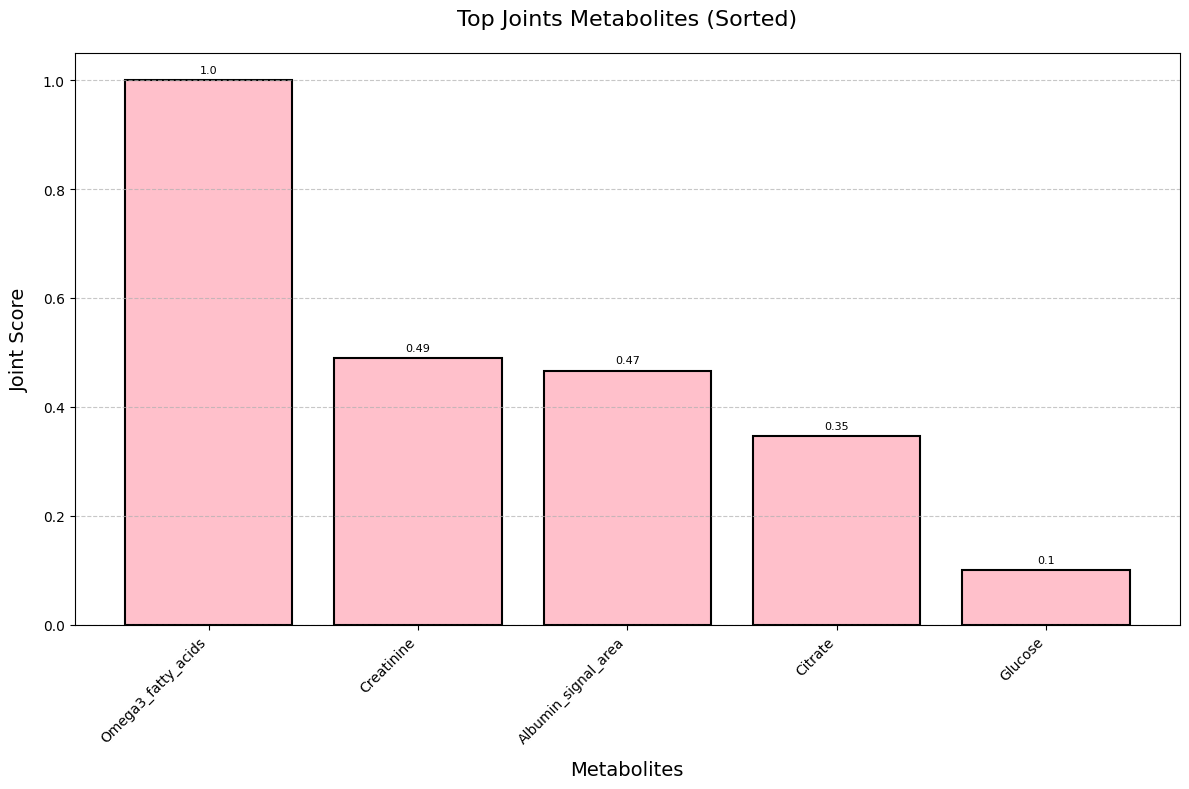

In [7]:
# Find the minimum and maximum values
min_value = min(result.values())
max_value = max(result.values())

# Define the desired range
desired_min = 0.1
desired_max = 1.0

# Normalize using custom Min-Max normalization to the desired range [0.1, 1.0]
normalized_result = {
    key: (value - min_value) / (max_value - min_value) * (desired_max - desired_min) + desired_min
    for key, value in result.items()
}

print(normalized_result)
      
import csv
# Create a list of lists with keys and normalized values
normalized_data = [[key, normalized_result[key]] for key in normalized_result]

# # Define the CSV file name in the current directory
# csv_file_name = 'normalized_data2.csv'

# # # Write the data to a CSV file in the current directory
# # with open(csv_file_name, mode='w', newline='') as file:
# #     writer = csv.writer(file)
# #     # Write the header
# #     writer.writerow(['Metabolite', 'Normalized Score'])
# #     # Write the data rows
# #     writer.writerows(normalized_data)

# print('Normalized data saved to', csv_file_name)
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have normalized_result as a dictionary containing your data

# Sort the dictionary items based on values in descending order
sorted_result = dict(sorted(normalized_result.items(), key=lambda item: item[1], reverse=True))

# Select the top 12 nodes
top_nodes = dict(list(sorted_result.items())[:12])

# Create a bar plot for the top 12 nodes with enhanced styling
plt.figure(figsize=(12, 8))  # Adjust the figure size for better presentation
bars = plt.bar(top_nodes.keys(), top_nodes.values(), color='pink', edgecolor='black', linewidth=1.5)

# Adding data labels on top of each bar for better readability
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8, color='black')

# Customize plot aesthetics
plt.xlabel('Metabolites', fontsize=14, labelpad=10)
plt.ylabel('Joint Score', fontsize=14, labelpad=10)
plt.title('Top Joints Metabolites (Sorted)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better visibility

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend or any additional annotations if needed
# plt.legend(['Legend 1', 'Legend 2'], loc='upper right', fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [8]:
top_nodes

{'Omega3_fatty_acids': 1.0,
 'Creatinine': 0.4895199928360545,
 'Albumin_signal_area': 0.4662872651404856,
 'Citrate': 0.3459476807849464,
 'Glucose': 0.1}

In [9]:


def import_adjacency_matrix(file_path, columnsnames):
    dataframe = pd.read_csv(file_path, header=None)
    variable_names = columnsnames
        
    
    dataframe.columns = variable_names
    dataframe.index = variable_names
    return dataframe

# Usage
file_path = 'adjacency_matrix_2007SA.csv'
df = import_adjacency_matrix(file_path, columnsnames = columnsnames)


import networkx as nx

# Create an empty graph
graph = nx.Graph()

# Assume df is a DataFrame containing the necessary data

# Assume the DataFrame df is already defined with appropriate data

# List of depressive symptoms
depressive_symptoms = [ 'Sadness',
 'Pessimism',
 'Past_failure',
 'Loss_of_pleasure',
 'Guilty_feelings',
 'Punishment_feelings',
 'Self_dislike',
 'Self_criticalness',
 'Suicidal_thought_or_wishes',
 'Crying',
 'Agitation',
 'Loss_of_interest',
 'Indecisiveness',
 'Worthlessness',
 'Loss_of_energy',
 'Changes_in_sleep_pattern',
 'Irritability',
 'Changes_in_appetite',
 'Concentration_difficulty',
 'Tiredness_or_fatigue',
 'Loss_of_interest_in_sex']
    
    
risk_factors = [ 'Systolic_blood_pressure',
 'Diastolic_blood_pressure',
 'Intima_media_thickness']


metabolites= ['Alanine',
 'Glutamine',
 'Histidine',
 'Isoleucine',
 'Leucine',
 'Phenylalanine',
 'Tyrosine',
 'Valine',
 'Apolipoprotein_A_I',
 'Apolipoprotein_B',
 'Esterified_cholesterol',
 'Free_cholesterol',
 'Total_cholesterol_HDL',
 'Total_cholesterol_HDL2',
 'Total_cholesterol_HDL3',
 'Total_cholesterol_LDL',
 'Remnant_cholesterol',
 'Serum_total_cholesterol',
 'Total_cholesterol_VLDL',
 'Linoleic_acid',
 'Docosahexaenoic_acid',
 'Linoleic_acid_R18_2',
 'Monounsaturated_fatty_acids',
 'Omega3_fatty_acids',
 'Omega6_fatty_acids',
 'Polyunsaturated_fatty_acids',
 'Saturated_fatty_acids',
 'Albumin_signal_area',
 'Creatinine',
 'Phosphatidylcholine',
 'Serum_total_triglycerides',
 'Sphingomyelins',
 'Total_cholines',
 'Total_phosphoglycerides',
 'Triglycerides_HDL',
 'Triglycerides_LDL',
 'Triglycerides_VLDL',
 'Citrate',
 'Glucose',
 'Lactate',
 'Glycoprotein_acetyls',
 'Hydroxybutyrate',
 'Acetate',
 'Acetoacetate',
 'HDL_particles_diameter',
 'LDL_particles_diameter',
 'VLDL_particles_diameter',
 'Degree_of_unsaturation',
 'Total_fatty_acids']


# Assume df is a DataFrame containing the necessary data
# Iterate over the columns and rows of the DataFrame
for column in df.columns:
    for row in df.index:
        # Check if the cell value is non-zero
        if df.loc[row, column] != 0:
            # Add an edge to the graph
            graph.add_edge(column, row)
            


            
        


# Create an empty graph
graph_inter = nx.Graph()


df.iloc[49:73, 49:73]  = 0.0


# Add nodes to the graph
nodes = df.columns
graph_inter.add_nodes_from(nodes)

# Iterate through the adjacency matrix to determine connections
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        if df.iloc[i, j] != 0:
            graph_inter.add_edge(nodes[i], nodes[j])
            
df.iloc[49:73, 49:73] 

,Sadness,Pessimism,Past_failure,Loss_of_pleasure,Guilty_feelings,Punishment_feelings,Self_dislike,Self_criticalness,Suicidal_thought_or_wishes,Crying,...,Loss_of_energy,Changes_in_sleep_pattern,Irritability,Changes_in_appetite,Concentration_difficulty,Tiredness_or_fatigue,Loss_of_interest_in_sex,Systolic_blood_pressure,Diastolic_blood_pressure,Intima_media_thickness
Sadness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pessimism,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Past_failure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Loss_of_pleasure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guilty_feelings,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Punishment_feelings,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Self_dislike,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Self_criticalness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Suicidal_thought_or_wishes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Crying,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
import networkx as nx

# Assuming graph_inter is a NetworkX graph object

# Step 1: Calculate betweenness centrality
betweenness = nx.degree_centrality(graph_inter)

# Step 2: Normalize centrality values to be in the range [0, 1]
max_betweenness = max(betweenness.values())
min_betweenness = min(betweenness.values())
normalized_betweenness = {node: (centrality - min_betweenness) / (max_betweenness - min_betweenness) for node, centrality in betweenness.items()}



# Define the list of nodes of interest
nodes_of_interest = common_metabolites

# Updated second list
dict2 = {node: normalized_betweenness[node] for node in nodes_of_interest}

print(dict2)
betweenness


{'Omega3_fatty_acids': 0.41379310344827586, 'Albumin_signal_area': 0.5862068965517242, 'Citrate': 0.8965517241379312, 'Glucose': 0.7931034482758621, 'Creatinine': 0.6206896551724138}


{'Alanine': 0.375,
 'Glutamine': 0.18055555555555555,
 'Histidine': 0.20833333333333331,
 'Isoleucine': 0.2638888888888889,
 'Leucine': 0.3472222222222222,
 'Phenylalanine': 0.25,
 'Tyrosine': 0.2222222222222222,
 'Valine': 0.3333333333333333,
 'Apolipoprotein_A_I': 0.3611111111111111,
 'Apolipoprotein_B': 0.2638888888888889,
 'Esterified_cholesterol': 0.2361111111111111,
 'Free_cholesterol': 0.3055555555555555,
 'Total_cholesterol_HDL': 0.15277777777777776,
 'Total_cholesterol_HDL2': 0.20833333333333331,
 'Total_cholesterol_HDL3': 0.125,
 'Total_cholesterol_LDL': 0.25,
 'Remnant_cholesterol': 0.3333333333333333,
 'Serum_total_cholesterol': 0.09722222222222221,
 'Total_cholesterol_VLDL': 0.3055555555555555,
 'Linoleic_acid': 0.2222222222222222,
 'Docosahexaenoic_acid': 0.3333333333333333,
 'Linoleic_acid_R18_2': 0.20833333333333331,
 'Monounsaturated_fatty_acids': 0.2361111111111111,
 'Omega3_fatty_acids': 0.16666666666666666,
 'Omega6_fatty_acids': 0.2638888888888889,
 'Polyunsaturate

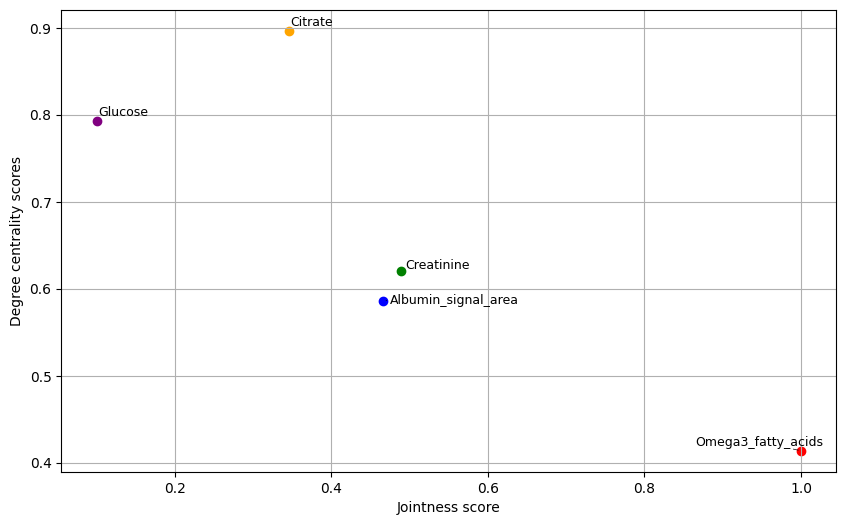

In [11]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import numpy as np

# Define a dictionary mapping node names to colors
node_colors = {
    'Omega3_fatty_acids': 'red',
    'Albumin_signal_area': 'blue',
    'Creatinine': 'green',
    'Citrate': 'orange',
    'Glucose': 'purple',

}

# Find common keys
common_keys = set(top_nodes.keys()) & set(dict2.keys())

# Filter dict2 to keep only common keys
dict2_filtered = {key: dict2[key] for key in common_keys}

# Prepare data for plotting
x_common = [key for key in common_keys]
y_common_1 = [top_nodes[key] for key in common_keys]
y_common_2 = [dict2[key] for key in common_keys]

# Add keys unique to dict1 with value 0
for key in set(top_nodes.keys()) - common_keys:
    x_common.append(key)
    y_common_1.append(top_nodes[key])
    y_common_2.append(0)

# Add keys unique to dict2 with value 0
for key in set(dict2.keys()) - common_keys:
    x_common.append(key)
    y_common_1.append(0)
    y_common_2.append(dict2[key])

# Plot
plt.figure(figsize=(10, 6))

# Plot each point with its corresponding color
for label, x, y in zip(x_common, y_common_1, y_common_2):
    plt.scatter(x, y, color=node_colors.get(label, 'black'))
    
# Use adjust_text to adjust label positions
texts = [plt.text(x, y, label, fontsize=9, color='black') for label, x, y in zip(x_common, y_common_1, y_common_2)]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))

plt.xlabel('Jointness score')
plt.ylabel('Degree centrality scores')

plt.grid(True)
plt.show()


In [12]:


# Initialize a dictionary to store connections
connections_dict = {metabolite: {'depressive_symptoms': [], 'risk_factors': []} for metabolite in common_metabolites}

# Iterate over the edges of the graph
for edge in graph.edges():
    # Check if one node is a common metabolite and the other is either a depressive symptom or a risk factor
    if edge[0] in common_metabolites and (edge[1] in depressive_symptoms or edge[1] in risk_factors):
        connections_dict[edge[0]]['depressive_symptoms'].append(edge[1])
    elif edge[1] in common_metabolites and (edge[0] in depressive_symptoms or edge[0] in risk_factors):
        connections_dict[edge[1]]['depressive_symptoms'].append(edge[0])
    # Check if one node is a common metabolite and the other is a risk factor
    elif edge[0] in common_metabolites and edge[1] in risk_factors:
        connections_dict[edge[0]]['risk_factors'].append(edge[1])
    elif edge[1] in common_metabolites and edge[0] in risk_factors:
        connections_dict[edge[1]]['risk_factors'].append(edge[0])

# Print the connections for each common metabolite
for metabolite, connections in connections_dict.items():
    print(f"{metabolite} is connected to:")
    if connections['depressive_symptoms']:
        print("Depressive symptoms:")
        for symptom in connections['depressive_symptoms']:
            print(f"- {symptom}")
    if connections['risk_factors']:
        print("Risk factors:")
        for factor in connections['risk_factors']:
            print(f"- {factor}")



Omega3_fatty_acids is connected to:
Depressive symptoms:
- Changes_in_appetite
- Intima_media_thickness
Albumin_signal_area is connected to:
Depressive symptoms:
- Changes_in_sleep_pattern
- Intima_media_thickness
Citrate is connected to:
Depressive symptoms:
- Worthlessness
- Diastolic_blood_pressure
Glucose is connected to:
Depressive symptoms:
- Changes_in_sleep_pattern
- Intima_media_thickness
Creatinine is connected to:
Depressive symptoms:
- Loss_of_interest
- Changes_in_sleep_pattern
- Intima_media_thickness
